In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
file_path = 'train.csv'

# Read the CSV file into a DataFrame.
# If the file does not have headers, specify header=None and assign a column name.
df = pd.read_csv(file_path, header=None, names=['sentence'])

#### EDA on given dataset

In [3]:
# DataFrame structure and general info
print("DataFrame Info:")
df.info()

# Display summary statistics
print("\nDataFrame Summary Statistics:")
print(df.describe(include='all'))

# Check the first few rows of the DataFrame
print("\nFirst Few Rows:")
print(df.head())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52499 entries, 0 to 52498
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  52499 non-null  object
dtypes: object(1)
memory usage: 410.3+ KB

DataFrame Summary Statistics:
            sentence
count          52499
unique         51134
top     [('.', '.')]
freq              44

First Few Rows:
                                            sentence
0  [('03/01/2001', 'NUM'), ('01:35', 'NUM'), ('PM...
1  [('The', 'DET'), ('industry', 'NOUN'), ('has',...
2  [('Love', 'VERB'), ('this', 'DET'), ('place', ...
3  [('This', 'DET'), ('problem', 'NOUN'), ('of', ...
4  [('Esso', 'PROPN'), ('said', 'VERB'), ('0', 'X...


#### Sentence Parsing
Converting the given sentence string to a list of tuples.

In [5]:
df['parsed_sentence'] = df['sentence'].apply(lambda x: ast.literal_eval(x))


#### EDA on given dataset

In [6]:
num_sentences = len(df)
print("\nTotal number of sentences:", num_sentences)
# Display DataFrame information
print("\nDataFrame Info:")
print(df.info())


Total number of sentences: 52499

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52499 entries, 0 to 52498
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentence         52499 non-null  object
 1   parsed_sentence  52499 non-null  object
dtypes: object(2)
memory usage: 820.4+ KB
None


In [21]:
# print the first row with all columns
print("After converting from string to list of tuples, the parsed sentence in first row:")
print(df['parsed_sentence'].iloc[0])
print(type(df['parsed_sentence'].iloc[0]))
# print more info about the column parsed. like, the datatype and stuff
# print(df['parsed'].apply(type).value_counts())
print("\nFirst value in first row of the parsed column:")
print(df['parsed_sentence'].iloc[0][0])
print(type(df['parsed_sentence'].iloc[0][0]))

After converting from string to list of tuples, the parsed sentence in first row:
[('03/01/2001', 'NUM'), ('01:35', 'NUM'), ('PM', 'NOUN')]
<class 'list'>

First value in first row of the parsed column:
('03/01/2001', 'NUM')
<class 'tuple'>


In [15]:
# Calculate sentence lengths (number of word-tag pairs per sentence)
df['sentence_length'] = df['parsed_sentence'].apply(lambda sentence: len(sentence))
print("\nSentence length statistics:")
print(df['sentence_length'].describe())

print("\nLength of sentences for first few rows:")
print(df['sentence_length'].head())


Sentence length statistics:
count    52499.000000
mean        20.133183
std         13.393047
min          1.000000
25%         10.000000
50%         18.000000
75%         27.000000
max        180.000000
Name: sentence_length, dtype: float64

Length of sentences for first few rows:
0     3
1    10
2     4
3    23
4    10
Name: sentence_length, dtype: int64


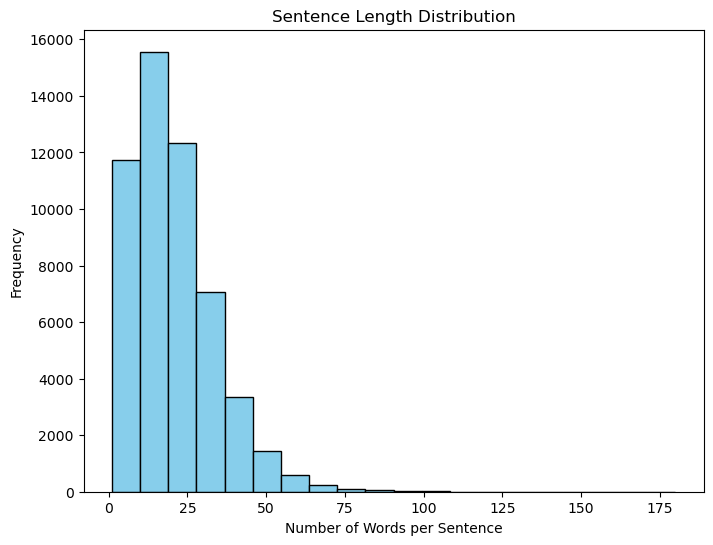

In [9]:
# Visualize the distribution of sentence lengths
plt.figure(figsize=(8, 6))
df['sentence_length'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words per Sentence")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

#### Separating word and corresponding tag pair for each word in all sentences 

In [10]:
# Create a list of dictionaries where each dictionary represents a word-tag pair.
records = []
for sentence in df['parsed_sentence']:
    for word, tag in sentence:
        records.append({'word': word, 'tag': tag})

# Create a new DataFrame from the records.
df_words = pd.DataFrame(records)
print(df_words)

               word    tag
0        03/01/2001    NUM
1             01:35    NUM
2                PM   NOUN
3               The    DET
4          industry   NOUN
...             ...    ...
1056967           .  PUNCT
1056968           B    ADJ
1056969           &  CCONJ
1056970           w    ADJ
1056971           .  PUNCT

[1056972 rows x 2 columns]


#### EDA on word-tag distribution

In [11]:
# Check basic information and types
print("Dataset Info:")
df_words.info()

# Summary statistics
print("\nDataset Summary Statistics:")
print(df_words.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
print(df_words.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056972 entries, 0 to 1056971
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   word    1056972 non-null  object
 1   tag     1056972 non-null  object
dtypes: object(2)
memory usage: 16.1+ MB

Dataset Summary Statistics:
           word      tag
count   1056972  1056972
unique    58110       21
top         the     NOUN
freq      54550   240200

Missing Values:
word    0
tag     0
dtype: int64



Tag Frequency Distribution:
tag
NOUN     240200
VERB     151833
ADP      125188
DET      115786
.         94933
ADJ       76692
ADV       49059
PRON      48875
CONJ      27234
PUNCT     23826
PROPN     19556
PRT       18688
NUM       17148
X         13180
AUX       12771
PART       7586
CCONJ      6535
SCONJ      3720
_          2668
INTJ        755
SYM         739
Name: count, dtype: int64


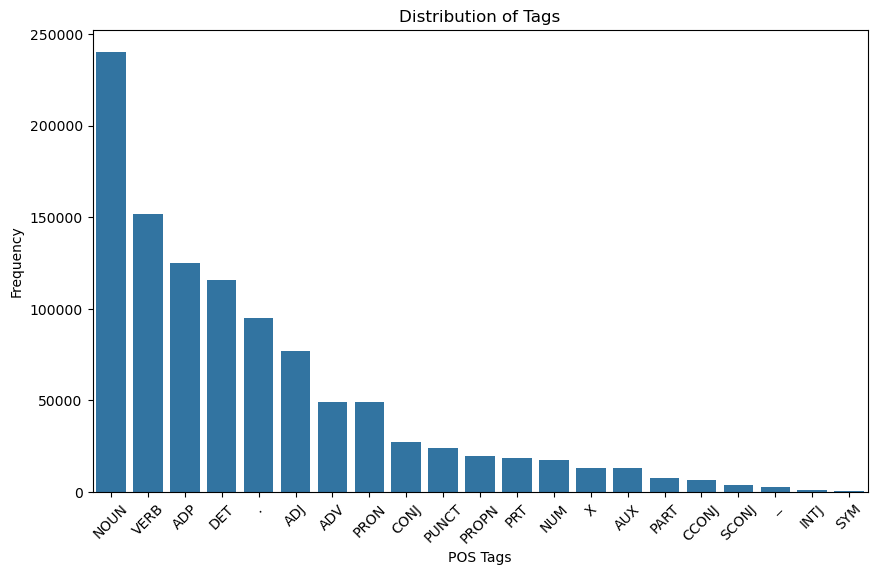

In [12]:
# Count the frequency of each tag
tag_distribution = df_words['tag'].value_counts()
print("\nTag Frequency Distribution:")
print(tag_distribution)

# Plot the distribution of tags
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=tag_distribution.index, y=tag_distribution.values)
plt.title("Distribution of Tags")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()



Top 10 Most Frequent Words:
word
the     54550
,       48932
.       42806
of      31103
and     24610
to      23947
a       19603
in      17703
is      10316
that     9456
Name: count, dtype: int64


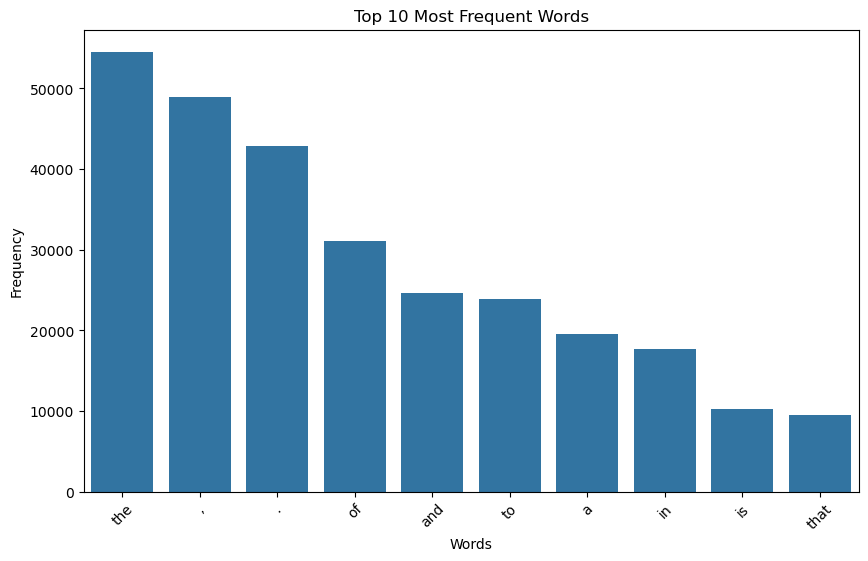

In [13]:
# Count the frequency of words
word_frequency = df_words['word'].value_counts()
print("\nTop 10 Most Frequent Words:")
print(word_frequency.head(10))

# Plot the top 10 most frequent words
plt.figure(figsize=(10, 6))
sns.barplot(x=word_frequency.head(10).index, y=word_frequency.head(10).values)
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


### Step-2. Pre-Processing